> Solution is optimal.


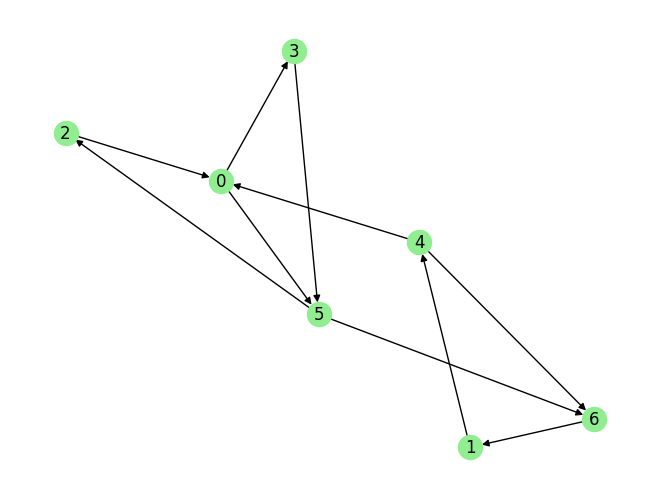

Máximo de arestas removidas: 1
Arestas removidas: [(1, 5)]


In [98]:
import networkx as nx
from z3 import Solver, Bool, Sum, If, And
import random
import matplotlib.pyplot as plt

def geraGrafo(min_nodes=6, max_nodes=10):
    N = random.randint(min_nodes, max_nodes)
    grafo = nx.DiGraph()
    grafo.add_nodes_from(range(N))

    for node in range(N):
        desc = random.randint(1, 3)
        dests = random.sample([n for n in range(N) if n != node], desc)
        for dest in dests:
            if not grafo.has_edge(dest, node):
                grafo.add_edge(node, dest)
    
    return grafo  

def solve(graph):
    solver = Solver()
    N = len(graph.nodes())
    
    # Criação de variáveis para as arestas
    E = {}
    for a, b in graph.edges():
        E[(a, b)] = Bool(f"E[{a},{b}]")
    
    # Restrições de conectividade
    for o in range(N):
        for d in range(N):
            if o != d:
                paths = list(nx.all_simple_paths(graph, source=o, target=d))
                if paths:
                    # Pelo menos um caminho deve estar disponível entre 'o' e 'd'
                    solver.add(Sum([If(And([E[(p[i], p[i+1])] for i in range(len(p) - 1)]), 1, 0) for p in paths]) >= 1)
    
    # Maximizar o número de arestas removidas mantendo a conectividade
    solver.add(Sum([If(E[(a, b)], 1, 0) for a, b in graph.edges()]) <= len(graph.edges()) - 1)
    
    # Resolver o problema
    if solver.check() == z3.sat:
        model = solver.model()
        print("> Solution is optimal.")
        
        # Criar o grafo de saída e contar as arestas removidas
        resultado_grafo = nx.DiGraph()
        arestas_removidas = []
        for (a, b) in graph.edges():
            if not model[E[(a, b)]]:
                arestas_removidas.append((a, b))
            else:
                resultado_grafo.add_edge(a, b)
        
        return resultado_grafo, len(arestas_removidas), arestas_removidas
    else:
        print("Not feasible.")
        return None, 0, []

# Exemplo de uso
graph = geraGrafo()
resultado_grafo, max_arestas_removidas, lista_arestas_removidas = solve(graph)

# Guardar o número máximo de arestas removidas numa lista
arestas_removidas_lista = [max_arestas_removidas]

# Desenhar o segundo grafo
if resultado_grafo:
    nx.draw(resultado_grafo, with_labels=True, node_color='lightgreen', arrows=True)
    plt.show()

print(f"Máximo de arestas removidas: {max_arestas_removidas}")
print(f"Arestas removidas: {lista_arestas_removidas}")